In [171]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import spacy
from datetime import datetime as dt
import pytz
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
merged_Tweets_df = pd.read_csv('/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/Hurricane/merged_data.csv')

In [3]:
estimated_df = pd.read_csv('/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/Hurricane/estimated_test.csv')

In [4]:
AuthorID_list = merged_Tweets_df['AuthorID'].unique()

In [24]:
merged_Tweets_df["CreateTime"]

'2019-09-28T21:32:46.000Z'

In [6]:
time_list =  merged_Tweets_df['CreateTime'].unique()

In [30]:
y_list = []
m_list = []
d_list = []
ymd_list = []
for time in time_list:
    y_list.append(int(time[0:4]))
    m_list.append(int(time[5:7]))
    d_list.append(int(time[8:10]))
    ymd_list.append(time[0:10])


ユーザーごと

In [9]:
user_sequence = merged_Tweets_df[merged_Tweets_df['AuthorID']==AuthorID_list[10]]
m = folium.Map(location=[35.6, 139.7], zoom_start=7.0)
for index, r in user_sequence.iterrows():
    folium.Marker([r.UserPlase_latitude,r.UserPlase_longitude]).add_to(m)
m

推論分析

In [13]:
estimated_True = estimated_df[estimated_df["code"]==estimated_df["geo_code"]]
estimated_False = estimated_df[estimated_df["code"]!=estimated_df["geo_code"]]

In [21]:
estimated_True

,Unnamed: 0.1,Unnamed: 0,Keyword,CreateTime,Text,CleanedText,AuthorID,place_id,Prefecture,ConversationID,...,QuoteCount,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code,geo_code
0,0,1173036096466210816,台風,2019-09-15T00:49:34.000Z,【トークノーカット】草彅剛、藤竜也と「ウルトラマンタロウ」を合唱も。全国88館中継舞台挨拶『...,【トークノーカット】草彅剛、藤竜也と「ウルトラマンタロウ」を合唱も。全国88館中継舞台挨拶『...,3.547341e+08,dcc2630623880f96,Tokyo,1.173036e+18,...,0.0,東京 練馬区,city,日本,139.562887,35.711731,139.681129,35.779999,5339,5339
4,4,1187612476906455040,雨,2019-10-25T06:10:53.000Z,東京都千代田区、とんでもない勢いの雨降ってます☔️ まさにバケツをひっくり返したような雨,東京都千代田区、とんでもない勢いの雨降ってます☔️ まさにバケツをひっくり返したような雨,1.859650e+08,28b9063fdce43645,Tokyo,1.187612e+18,...,0.0,東京 千代田区,city,日本,139.729893,35.668551,139.782836,35.705218,5339,5339
8,8,1175195374669172742,雨,2019-09-20T23:49:46.000Z,今朝も、南海電鉄：和泉大宮駅にてご挨拶！（AM6:30～8:10）怪しく分厚い雲が広がる中で...,今朝も、南海電鉄:和泉大宮駅にてご挨拶!(AM6:30~8:10)怪しく分厚い雲が広がる中で...,9.922767e+07,5aa7fafafb263f5a,Osaka,1.175195e+18,...,0.0,大阪 岸和田市,city,日本,135.345536,34.347218,135.463842,34.499614,5135,5135
9,9,1182950292666535936,台風,2019-10-12T09:25:02.000Z,@worldmetalmaker 揺れた、台風に地震は勘弁だネ,揺れた、台風に地震は勘弁だネ,1.049479e+18,1b0cfebe3424e14f,Tokyo,1.182950e+18,...,0.0,東京 世田谷区,city,日本,139.582428,35.590036,139.686603,35.682992,5339,5339
13,13,1170304402436943872,台風,2019-09-07T11:54:47.000Z,@dminikuir 一方その頃台風15号さんは…,一方その頃台風15号さんは,1.627953e+08,735b6f2b933efaf6,Tokyo,1.170268e+18,...,0.0,東京 中央区,city,日本,139.758528,35.644646,139.793196,35.696630,5339,5339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,990,1179905167996538881,雨,2019-10-03T23:44:48.000Z,@yuumari65 おはようございます🍀台風の影響なのか、朝から強い雨と風に襲われています...,おはようございます🍀台風の影響なのか、朝から強い雨と風に襲われています😢きょうは、2ヶ月に1...,2.929715e+09,49524fd7b35fd754,Tokyo,1.179864e+18,...,0.0,東京 府中市,city,日本,139.429240,35.646624,139.526371,35.699865,5339,5339
991,991,1183135756677599232,台風,2019-10-12T21:42:00.000Z,今朝も気象庁は河川の増水や氾濫に厳重な警戒をと。戦後最大の大型台風１９号、日が空けてくると、...,今朝も気象庁は河川の増水や氾濫に厳重な警戒をと。戦後最大の大型台風19号、日が空けてくると、...,2.742197e+08,4ad3383e25ac98d9,Tokyo,1.183136e+18,...,0.0,東京 品川区,city,日本,139.695191,35.584544,139.774255,35.641576,5339,5339
993,993,1188971653910253569,雨,2019-10-29T00:11:46.000Z,おはようございます☔️\n\n29日(火)\n\n昼の部 11:30〜14:30\n夜の部...,おはようございます☔️ 29日(火) 昼の部 11:30〜14:30 夜の部 18:...,1.073035e+18,db215c78c59027e4,Chiba,1.188972e+18,...,0.0,千葉 市川市,city,日本,139.885492,35.655568,139.976610,35.775796,5339,5339
994,994,1182840444192841731,台風,2019-10-12T02:08:32.000Z,皆さんおはようございます☔️🌀🌪⚠️🇺🇸🇺🇸アナタの笑顔を予告タッチダウン🏈アメフトグッズが...,皆さんおはようございます☔️🌀🌪⚠️🇺🇸🇺🇸アナタの笑顔を予告タッチダウン🏈アメフトグッズが...,1.382995e+08,32049a95db695cb8,Tokyo,1.182840e+18,...,0.0,東京 台東区,city,日本,139.762233,35.694775,139.809743,35.731637,5339,5339


In [27]:
m = folium.Map(location=[35.6, 139.7], zoom_start=7.0)
marker_cluster = MarkerCluster().add_to(m)
for index, r in estimated_True.iterrows():
    folium.Marker([r.UserPlase_latitude,r.UserPlase_longitude]).add_to(marker_cluster)
m

In [29]:
m = folium.Map(location=[35.6, 139.7], zoom_start=7.0)
marker_cluster = MarkerCluster().add_to(m)
for index, r in estimated_False.iterrows():
    folium.Marker([r.UserPlase_latitude,r.UserPlase_longitude]).add_to(marker_cluster)
m

In [30]:

# モデルのロード
nlp = spacy.load("ja_core_news_md")
# 解析対象のテキストa
input_text = "8月に東京に行く"
# モデルに解析対象のテキストを渡す
doc = nlp(input_text)
# 固有表現を抽出
for ent in doc.ents:
    print(ent.text, ent.label_, ent.start_char, ent.end_char)

2022-10-04 17:33:21.514927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-10-04 17:33:21.514962: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


8月 DATE 0 2
東京 GPE 3 5


In [32]:
sentences_True = estimated_True.Text.values

In [46]:
counter_in_True=0
for text in sentences_True:
    Flag=0
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_=="GPE":
            Flag=1
        if Flag==1:
            counter_in_True+=1
counter_in_True

339

In [47]:
sentences_False = estimated_False.Text.values

In [44]:
counter_in_False=0
for text in sentences_True:
    Flag=0
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_=="GPE":
            Flag=1
        if Flag==1:
            counter_in_False+=1
counter_in_False

339

In [45]:
counter_in_False

339

時間分析

１dayごと

In [122]:
time_line_df = pd.read_csv("/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/Hurricane/split_time.csv")

In [123]:
compare_times = time_line_df.ymd.unique()

In [124]:
compare_times.sort()

In [127]:
tweet_nums_per_day = []
for i in compare_times:
    tweet_nums_per_day.append(len(time_line_df[time_line_df['ymd']==i]))

In [151]:
hour_for_xlabel = []
for i in compare_times:
    hour_for_xlabel.append(str(i)[-2:])

In [164]:
xlabel = []
for i in compare_times:
    xlabel.append('{}/{}'.format(str(i)[4:6],str(i)[6:8]))


In [172]:
len(xlabel)

123

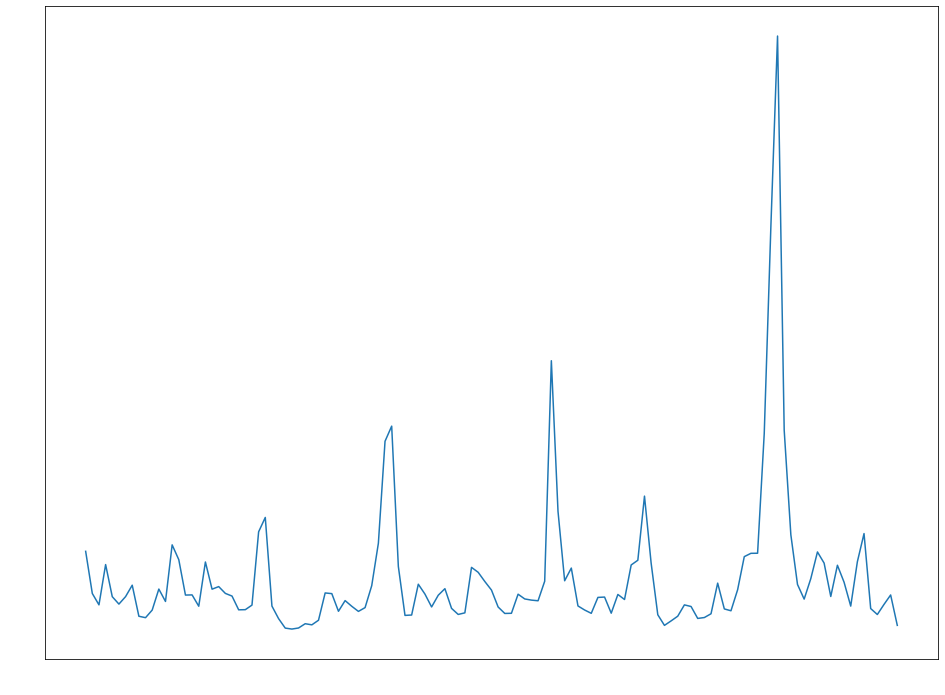

In [174]:
plt.rcParams["figure.figsize"] = (16, 12)
plt.xticks(rotation=30)
plt.tick_params(direction = "inout", length = 5, colors = "white")
plt.xticks(np.arange(0, 123, 10))
plt.plot(xlabel,tweet_nums_per_day)

1hourごと
hagibis

In [234]:
compare_times_hour = time_line_df.ymdh.unique()
compare_times_hour.sort()
compare_times_hour = compare_times_hour[2328:2592]

In [254]:
xlabel_hour = []
for i in compare_times_hour:
    xlabel_hour.append('{}/{}/{}'.format(str(i)[4:6],str(i)[6:8],str(i)[8:10]))

In [255]:
tweet_nums_per_hour = []
for i in compare_times_hour:
    tweet_nums_per_hour.append(len(time_line_df[time_line_df['ymdh']==i]))

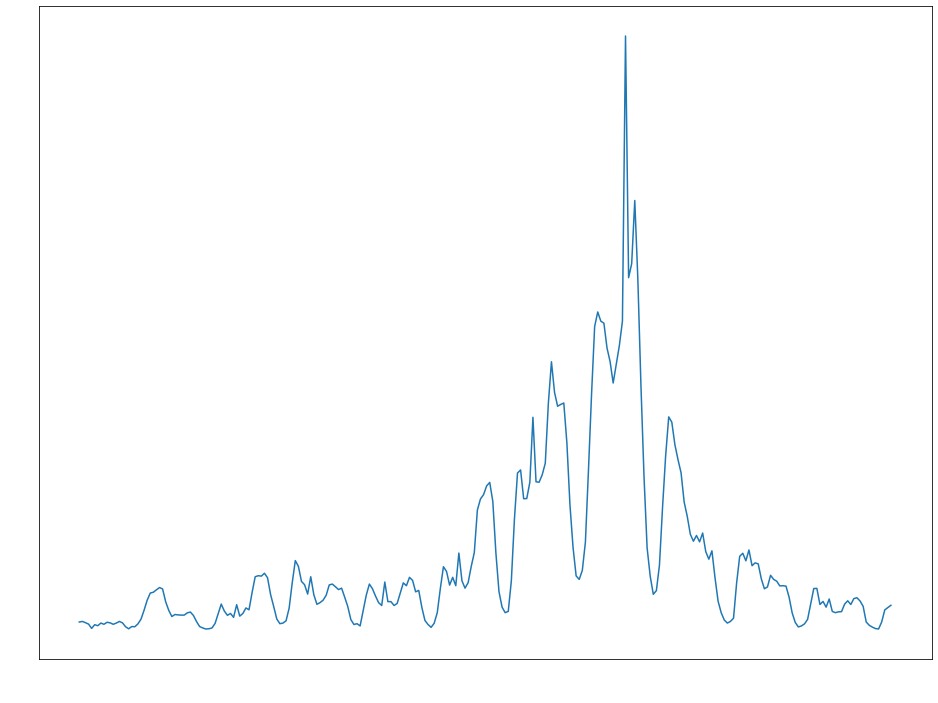

In [256]:
plt.rcParams["figure.figsize"] = (16, 12)
plt.xticks(rotation=30)
plt.tick_params(direction = "inout", length = 5, colors = "white")
plt.xticks(np.arange(0, 264, 24))
plt.plot(xlabel_hour,tweet_nums_per_hour)

In [189]:
m = folium.Map(location=[35.6, 139.7], zoom_start=5.0)
marker_cluster = MarkerCluster().add_to(m)
for index, r in time_line_df[(time_line_df['month']==10) & (time_line_df['day']==6)].iterrows():
    folium.Marker([r.UserPlase_latitude,r.UserPlase_longitude]).add_to(marker_cluster)
m